In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
data=pd.read_csv('train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


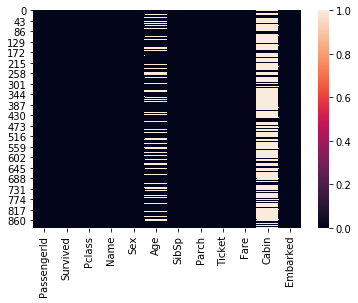

In [4]:
sns.heatmap(data.isnull())

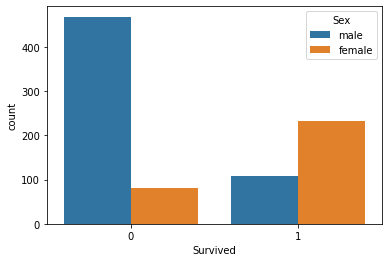

In [5]:
sns.countplot('Survived',hue='Sex',data=data)

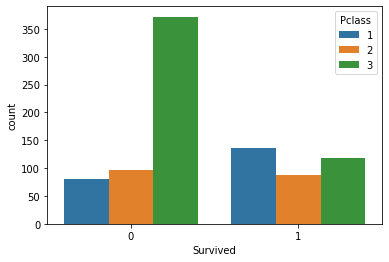

In [6]:
sns.countplot('Survived',hue='Pclass',data=data)

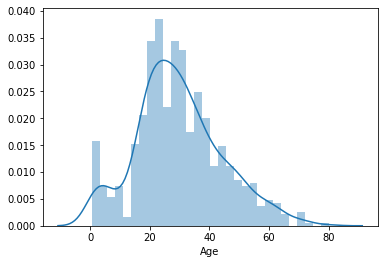

In [7]:
sns.distplot(data['Age'].dropna(),kde=True,bins=30)

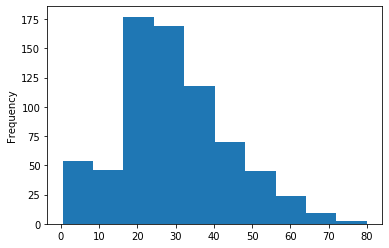

In [8]:
data['Age'].plot.hist()

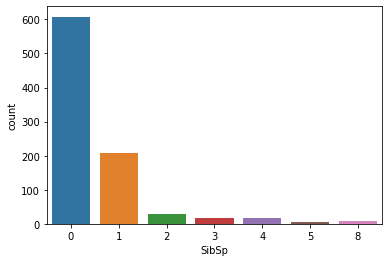

In [9]:
sns.countplot('SibSp',data=data)

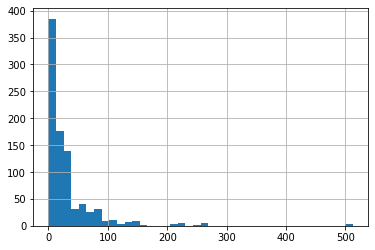

In [12]:
data['Fare'].hist(bins=40)

In [20]:
import cufflinks as cf
cf.go_offline()
data['Fare'].iplot(kind='hist',bins=40,color='purple')

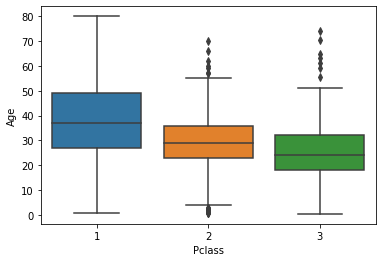

In [21]:
sns.boxplot(x='Pclass',y='Age',data=data)

In [24]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [26]:
data['Age']=data[['Age','Pclass']].apply(impute_age,axis=1)

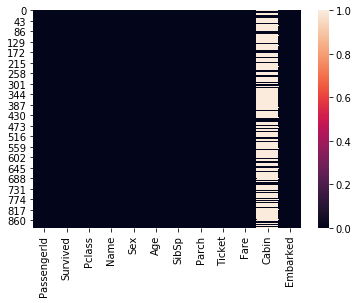

In [27]:
sns.heatmap(data.isnull())

In [28]:
data.drop('Cabin',inplace=True,axis=1)

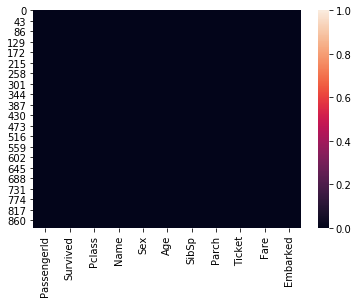

In [29]:
sns.heatmap(data.isnull())

In [30]:
data.dropna(inplace=True)

In [31]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


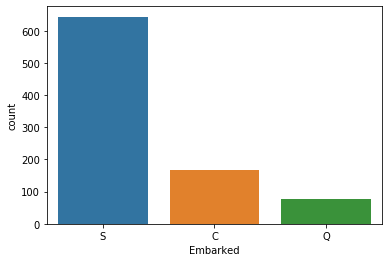

In [32]:
sns.countplot('Embarked',data=data)

In [36]:
sex=pd.get_dummies(data['Sex'],drop_first=True)

In [37]:
embark=pd.get_dummies(data['Embarked'],drop_first=True)

In [39]:
train=pd.concat([data,sex,embark],axis=1)

In [40]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S,1,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,W./C. 6607,23.4500,S,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C,1,1,0,0


In [42]:
data.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace=True)

In [43]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male
0,1,0,3,22.0,1,0,7.2500,1
1,2,1,1,38.0,1,0,71.2833,0
2,3,1,3,26.0,0,0,7.9250,0
3,4,1,1,35.0,1,0,53.1000,0
4,5,0,3,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,1
887,888,1,1,19.0,0,0,30.0000,0
888,889,0,3,24.0,1,2,23.4500,0
889,890,1,1,26.0,0,0,30.0000,1


In [44]:
data.drop(['PassengerId'],axis=1,inplace=True)

In [46]:
x=data[['Survived','Pclass','Age','SibSp','Parch','Fare','male']]
y=data['Survived']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=101)

In [50]:
model=LogisticRegression()

In [51]:
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions=model.predict(test_x)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(test_y,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       163
           1       1.00      1.00      1.00       104

    accuracy                           1.00       267
   macro avg       1.00      1.00      1.00       267
weighted avg       1.00      1.00      1.00       267



In [62]:
print(confusion_matrix(test_y,predictions))

[[163   0]
 [  0 104]]
